# Exponential Smoothing

# **Requires a minimum of 2 periods (minimum 2 years of data) to product statistically significant forecasts to allow for the detection of underlying patterns like seasonality and trends**

Simple, double, and triple exponential smoothing are methods for time series forecasting, each more complex than the last.
1. Simple exponential smoothing is for data with no trend or seasonality.  
2. Double exponential smoothing (Holt's method) adds a second smoothing parameter to account for a trend.  
3. Triple exponential smoothing (Holt-Winters method) adds a third component for seasonality.

* Use the past to predict the future giving more weight to recent information

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters"

/content/drive/MyDrive/0.Cloud Computing and Streaming Tech/OCI AI/0.GoogleColab/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

In [4]:
# Set the index when we import the data
df = pd.read_csv('weekly_customer_complaints.csv', index_col='week', parse_dates=True)
df.head()

complaints discount_rate  small_commercial_event  \
week                                                          
2018-01-01      1,750        37.26%                       1   
2018-01-08      1,701        35.38%                       0   
2018-01-15      1,711        36.22%                       1   
2018-01-22      1,443        38.33%                       1   
2018-01-29      1,397        36.34%                       0   

            medium_commercial_event  big_commercial_event  
week                                                       
2018-01-01                        0                     0  
2018-01-08                        0                     0  
2018-01-15                        0                     0  
2018-01-22                        0                     0  
2018-01-29                        0                     0

In [5]:
# Change the name of the time series variable to y
df = df.rename(columns = {"complaints": "y"})
df.head()

y discount_rate  small_commercial_event  \
week                                                      
2018-01-01  1,750        37.26%                       1   
2018-01-08  1,701        35.38%                       0   
2018-01-15  1,711        36.22%                       1   
2018-01-22  1,443        38.33%                       1   
2018-01-29  1,397        36.34%                       0   

            medium_commercial_event  big_commercial_event  
week                                                       
2018-01-01                        0                     0  
2018-01-08                        0                     0  
2018-01-15                        0                     0  
2018-01-22                        0                     0  
2018-01-29                        0                     0

In [6]:
# Preview of the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   y                        261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [7]:
# Remove the comma from df.y and tranform into an integer
df["y"] = df["y"].str.replace(",", "").astype(int)
df.head()

y discount_rate  small_commercial_event  \
week                                                     
2018-01-01  1750        37.26%                       1   
2018-01-08  1701        35.38%                       0   
2018-01-15  1711        36.22%                       1   
2018-01-22  1443        38.33%                       1   
2018-01-29  1397        36.34%                       0   

            medium_commercial_event  big_commercial_event  
week                                                       
2018-01-01                        0                     0  
2018-01-08                        0                     0  
2018-01-15                        0                     0  
2018-01-22                        0                     0  
2018-01-29                        0                     0

# Daily Visualization

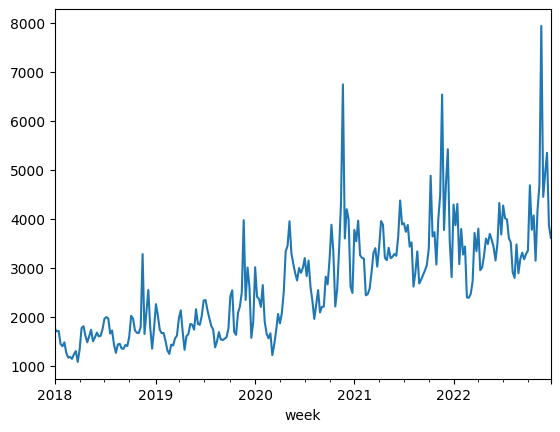

In [8]:
# Time Series Plot
df["y"].plot()
plt.show()

# Seasonality

In [9]:
# Plot the month_plot
month_plot(df['y'].resample('ME').mean())
plt.show()

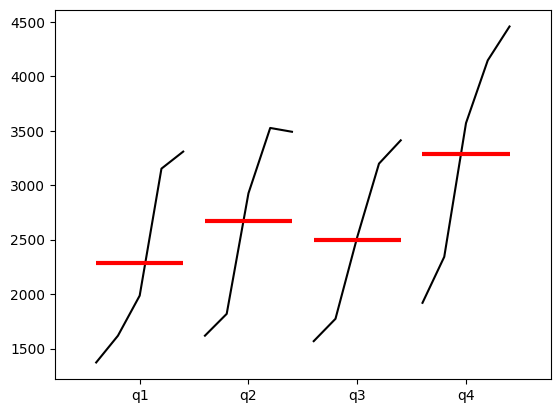

In [10]:
# Plot the quarter_plot
quarter_plot(df['y'].resample("QE").mean())
plt.show()

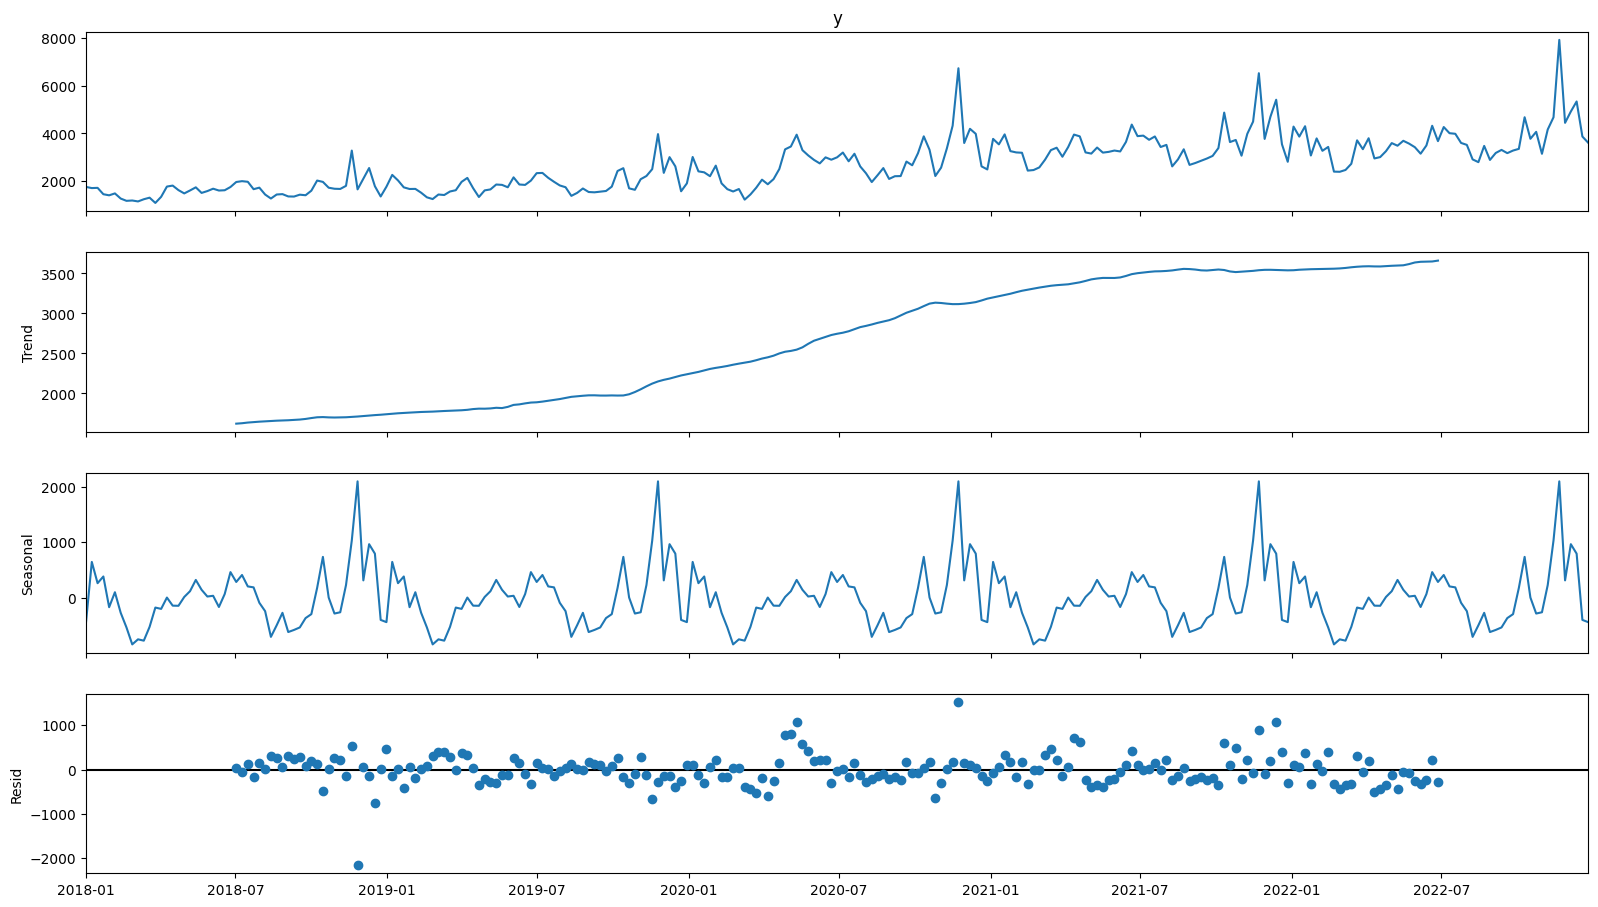

In [11]:
# Seasonal decompositon for df['Adj.Close']
decompositon = seasonal_decompose(df['y'],
                                  model = 'additive',
                                  period = 52)
fig = decompositon.plot()
fig.set_size_inches(18, 10)
plt.show()

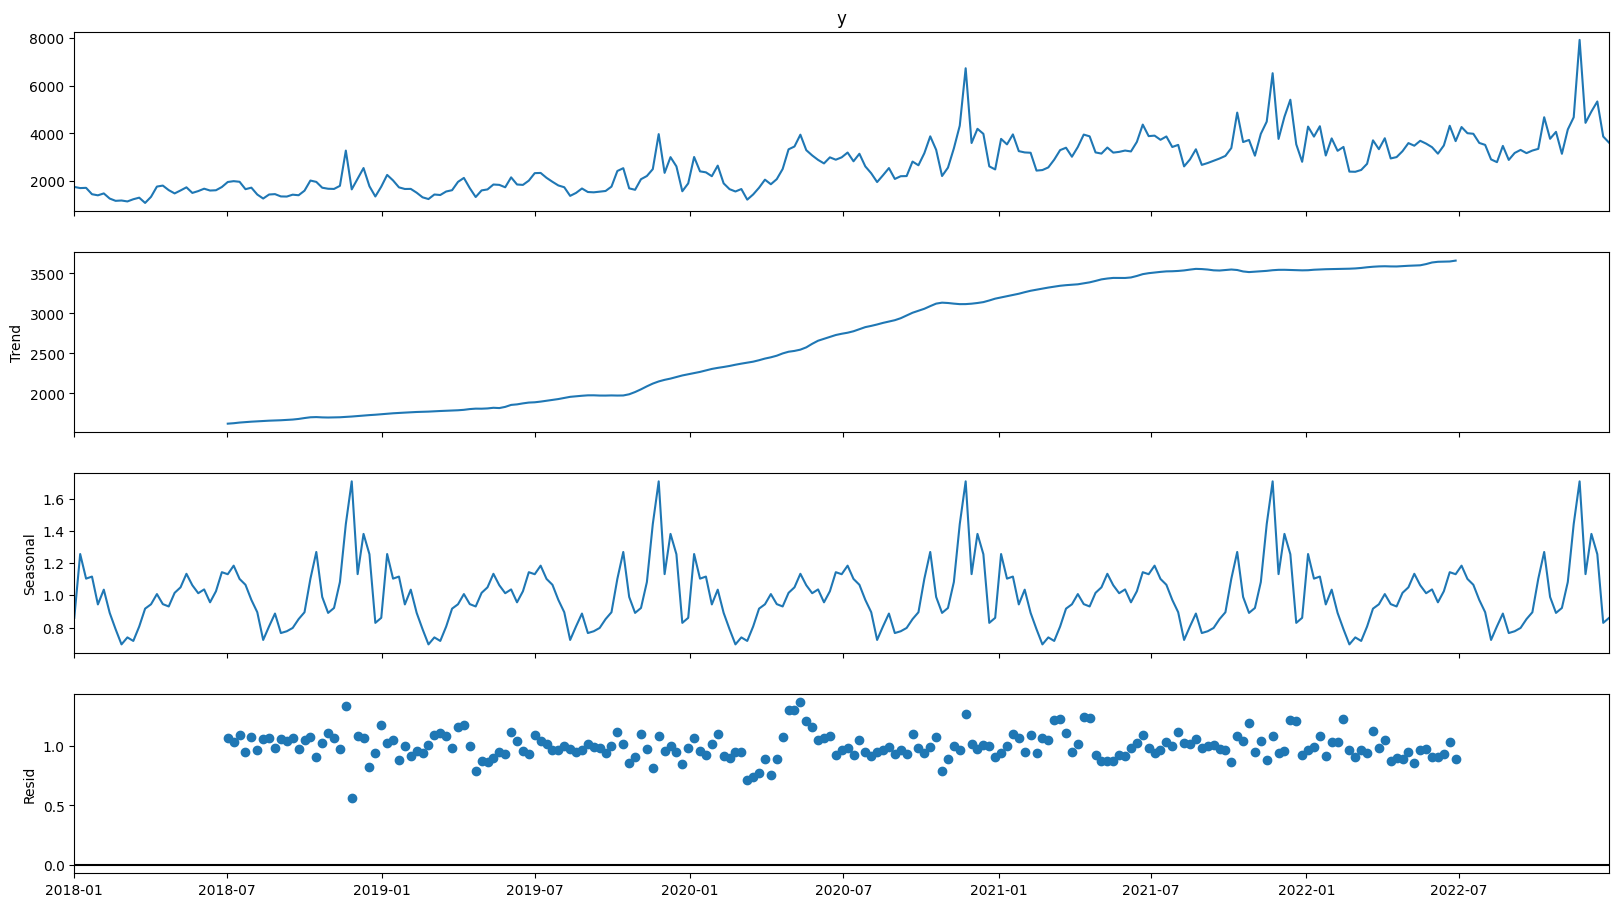

In [12]:
# Seasonal decompositon for df['Adj.Close']
decompositon = seasonal_decompose(df['y'],
                                  model = 'multiplicative',
                                  period = 52)
fig = decompositon.plot()
fig.set_size_inches(18, 10)
plt.show()

# (Partial) Auto-Correlation

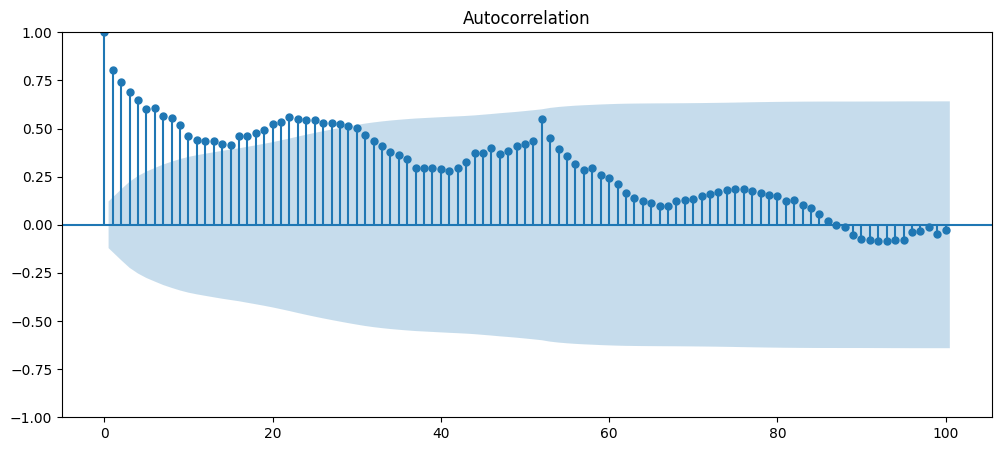

In [13]:
# Plot the ACF of the Auto-Correlation
fig, ax = plt.subplots(figsize = (12, 5))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

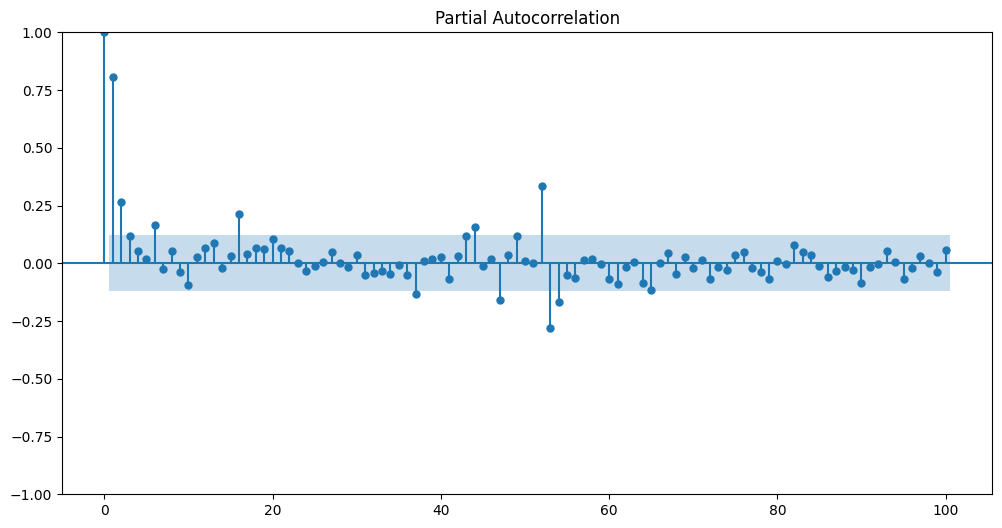

In [14]:
# PACF
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df['y'], lags = 100, ax = ax)
plt.show()

# Time Series Frequency

In [15]:
# Print the frequency of the time series
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [16]:
# Change the frequency to W-Mon
df = df.asfreq('W-Mon')
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Training and Test

# GOAL: Predict the next 13 weeks

In [17]:
# Split the data into training and test

In [18]:
periods = 13
train = df[:-periods].y
test = df[-periods:].y

In [19]:
# Other way to split data
# train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]

In [20]:
train.tail()

week
2022-08-29    2885
2022-09-05    3177
2022-09-12    3306
2022-09-19    3170
2022-09-26    3279
Freq: W-MON, Name: y, dtype: int64

# Forecasting

Next Forecast = Current Level + alpha * (Recent Actual - Current Level)

(Recent Actual - Current Level) - is the delta

* Current Level - this is the baseline
* Recent Actual - most recent obervations
* Alpha - This is the fine tuner (applying an adjustment to the calculation to forecast the future)

# 1. Simple Exponential Smoothing - For smoothing out the data

In [22]:
# Apply SES t othe train data
ses_model = SimpleExpSmoothing(train).fit()
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                      y   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355478.081
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Fri, 24 Oct 2025
Box-Cox:                        False   Time:                         23:30:30
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5097819                alpha                 True
initial_level              1750.0000                

In [24]:
# Compute with the initial level calculation
# train.iloc[-1] * 51 + 1750

np.int64(3279)

In [23]:
# Predictions
ses_pred = ses_model.forecast(periods)
ses_pred

2022-10-03    3236.663473
2022-10-10    3236.663473
2022-10-17    3236.663473
2022-10-24    3236.663473
2022-10-31    3236.663473
2022-11-07    3236.663473
2022-11-14    3236.663473
2022-11-21    3236.663473
2022-11-28    3236.663473
2022-12-05    3236.663473
2022-12-12    3236.663473
2022-12-19    3236.663473
2022-12-26    3236.663473
Freq: W-MON, dtype: float64

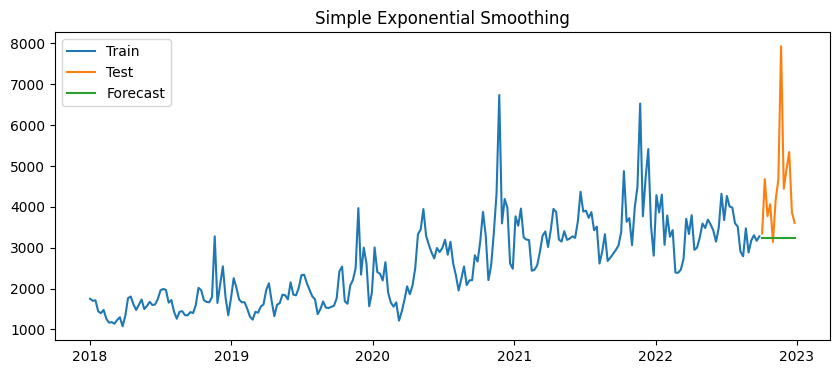

In [25]:
# Set the size of the plot of: 10 by 4
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_pred, label = 'Forecast')

# Add a title and legent to the plot
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

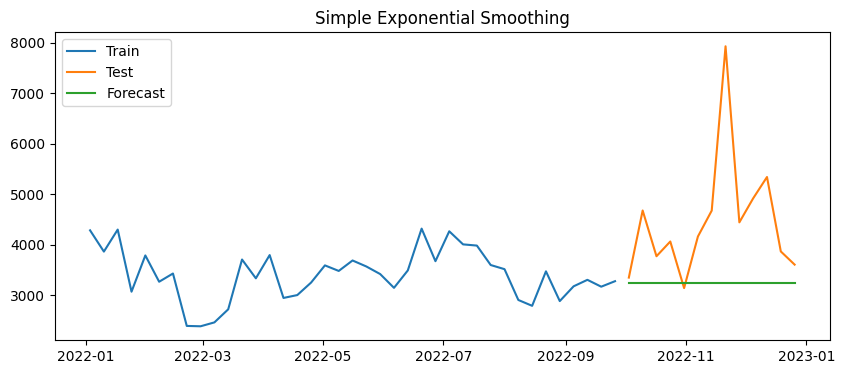

In [27]:
# Set the size of the plot of: 10 by 4
# Example of a bad forecasting model
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(ses_pred, label = 'Forecast')

# Add a title and legent to the plot
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

# 2. Double Exponential Smoothing - For picking up the trends in the data

Smooths out the data and accounts for trends in the data. 2 formulas:  

* Smoothed Teve = (alpha * Recent Actual) + [(1 - alpha) * (Previous Level - Previous Trend)]

* Smmothed Trend = beta * (Smoothed Level - Previous Level) + [(1 - beta) * Previous Trend)].
  
* alpha - adjusts how much we consider the recent sales v's the previous level and trend
* beta - tunes how much weight we give to the change in the trend
* Double exponential smoothing reveals overall upward trend, smoothing weekly fluctuations

*Does NOT account for seasonality*


In [29]:
# Build double exponential smoothing model
model_double = ExponentialSmoothing(
    endog = train,
    trend='add',
    seasonal=None).fit()
print(model_double.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       74343958.374
Optimized:                         True   AIC                           3135.474
Trend:                         Additive   BIC                           3149.528
Seasonal:                          None   AICC                          3135.823
Seasonal Periods:                  None   Date:                 Sat, 25 Oct 2025
Box-Cox:                          False   Time:                         00:32:03
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5093872                alpha                 True
smoothing_trend             0.0000

In [30]:
# Predict with the double ES model
double_pred = model_double.forecast(periods)
double_pred

2022-10-03    3248.184263
2022-10-10    3254.072668
2022-10-17    3259.961074
2022-10-24    3265.849480
2022-10-31    3271.737885
2022-11-07    3277.626291
2022-11-14    3283.514697
2022-11-21    3289.403102
2022-11-28    3295.291508
2022-12-05    3301.179913
2022-12-12    3307.068319
2022-12-19    3312.956725
2022-12-26    3318.845130
Freq: W-MON, dtype: float64

In [33]:
# Plot the train, test and forecast
# Nothing changed from Simple Exponential Smoothing
plt.figure(figsize = (10,4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(double_pred, label = 'Forecast')

# Add a title and legend to the plot
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

# 3. Triple Exponential Smoothing (Holt-Winters Method) - Accounts for seasonality

Holt-Winters is highly effective in forecasting where data has recurring patterns

Data is split into 3 levels:
1. Baseline level - Alpha
2. Assesses the increasing/decreasing trend over time - Beta
3. Seasonality - Gamma

Overview:  
* Starts by adjusting the level
* Looks at how the average trend has changed over time
* Looks at the repeating cycles


Coefficients - alpha, beta, gamma controls component weights

